In [1]:
%load_ext autoreload
%autoreload 2

from train_classifier import *
import numpy as np

In [ ]:
### Face Forensics
svm_model = train_forgery_detector('/data/home/shruti/voxceleb/fabnet_metric',
                               '/data/home/shruti/voxceleb/vgg/leaders', 
                               {'frames': 1, 'step': 1, 'pool_func': np.mean, 'a': 1 }, 
                               {'frames': 100, 'step': 5, 'pool_func': np.mean, 'a': 1 }, do_cv=False)



FF_Deepfakes/241_210.npy [Errno 2] No such file or directory: '/data/home/shruti/voxceleb/fabnet_metric/FF_Deepfakes/_241_210.npy'
['FF_orig']
FF_Deepfakes
FF_FaceSwap
FF_Face2Face
FF_NeuralTextures
['FF_orig']
FF_Deepfakes
FF_FaceSwap
FF_Face2Face
FF_NeuralTextures


In [2]:
# VGG test
vgg_pool_len = 100
vgg_step = 5
vgg_func = [np.mean]

In [ ]:
### Face Forensics
results_FF_half_vgg = {}
results_fpr_tpr_rate = {}
for fnc in range(len(vgg_func)):
    vgg_pool_params = {'frames': vgg_pool_len, 'step': vgg_step, 'pool_func': vgg_func[fnc]}
    results_FF_half_vgg[fnc], results_fpr_tpr_rate[fnc] = \
    test_FF_half('/data/home/shruti/voxceleb/vgg/leaders/', vgg_pool_params)
    display(results_FF_half_vgg[fnc])

In [5]:

### Leaders Unseen Identities
results_unseen_id_vgg = {}
for fnc in range(len(vgg_func)):
    vgg_pool_params = {'frames': vgg_pool_len, 'step': vgg_step, 'pool_func': vgg_func[fnc]}
    results_unseen_id_vgg[fnc] = test_unseen_identities('/data/home/shruti/voxceleb/vgg/leaders/', 
                                                        vgg_pool_params, parallel=False)
    display(results_unseen_id_vgg[fnc])
    

,diff,faceswap,imposter,leader_name
0,0.999982,1.000000,1.000000,bo
1,0.999999,0.951883,0.999836,bs
2,1.000000,0.999281,1.000000,ew
3,1.000000,0.816109,1.000000,hc
4,0.999995,0.945716,0.988437,dt
5,0.999968,NaN,NaN,jb
6,1.000000,NaN,NaN,cb
7,1.000000,NaN,NaN,pb
8,1.000000,NaN,NaN,kh
9,1.000000,NaN,NaN,br


In [6]:

### Leaders Multiple Identities
results_multiple_id_vgg = {}
confusion_multiple_id_vgg = {}
for fnc in range(len(vgg_func)):
    vgg_pool_params = {'frames': vgg_pool_len, 'step': vgg_step, 'pool_func': vgg_func[fnc]}
    results_unseen_id_vgg[fnc], confusion_multiple_id_vgg[fnc] = test_multiple_identities('/data/home/shruti/voxceleb/vgg/leaders/', 
                                                                             vgg_pool_params, parallel=True)
    display(results_unseen_id_vgg[fnc])
    display(confusion_multiple_id_vgg[fnc])
    

[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done   8 tasks      | elapsed:  1.2min
[Parallel(n_jobs=96)]: Done 258 tasks      | elapsed:  1.5min
[Parallel(n_jobs=96)]: Done 608 tasks      | elapsed:  1.8min
[Parallel(n_jobs=96)]: Done 1058 tasks      | elapsed:  2.2min
[Parallel(n_jobs=96)]: Done 1608 tasks      | elapsed:  2.6min
[Parallel(n_jobs=96)]: Done 2258 tasks      | elapsed:  3.1min
[Parallel(n_jobs=96)]: Done 3008 tasks      | elapsed:  3.6min
[Parallel(n_jobs=96)]: Done 3858 tasks      | elapsed:  4.3min
[Parallel(n_jobs=96)]: Done 4808 tasks      | elapsed:  5.0min
[Parallel(n_jobs=96)]: Done 5858 tasks      | elapsed:  5.8min
[Parallel(n_jobs=96)]: Done 7008 tasks      | elapsed:  6.7min
[Parallel(n_jobs=96)]: Done 8258 tasks      | elapsed:  7.7min
[Parallel(n_jobs=96)]: Done 9608 tasks      | elapsed:  8.7min
[Parallel(n_jobs=96)]: Done 11058 tasks      | elapsed:  9.8min
[Parallel(n_jobs=96)]: Done 12608 tasks    

,diff,faceswap,imposter,leader_name
0,0.999812,1.000000,1.000000,bo
1,0.999759,0.951895,1.000000,bs
2,0.999873,0.999281,1.000000,ew
3,0.997882,0.816109,1.000000,hc
4,0.999153,0.945716,0.988437,dt
5,0.998728,NaN,NaN,jb
6,0.999696,NaN,NaN,cb
7,0.999867,NaN,NaN,pb
8,0.999886,NaN,NaN,kh
9,0.999773,NaN,NaN,br


pred_name,bo,br,bs,cb,dt,ew,hc,jb,kh,pb
true_name,,,,,,,,,,
FF_orig,0.051000,0.046000,0.051200,0.127000,0.083800,0.045200,0.212400,0.071000,0.227000,0.0854
bo,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bo_faceswap,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bo_imposter,0.567152,NaN,NaN,0.231796,0.001214,NaN,NaN,0.023058,0.176780,NaN
br,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bs,0.000200,NaN,0.999600,NaN,NaN,NaN,NaN,0.000200,NaN,NaN
bs_faceswap,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bs_imposter,NaN,NaN,0.891892,0.108108,NaN,NaN,NaN,NaN,NaN,NaN
cb,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#**************************************************************************************************************%
# fabnet test
fab_pool_len = 1
fab_step = 1
fab_func = [np.mean]

source embedding (5000, 512)
(38, 512)
(46, 512)
(60, 512)
(27, 512)
(28, 512)
(37, 512)
(21, 512)
(51, 512)
(67, 512)
(49, 512)
(47, 512)
(69, 512)
(34, 512)
(30, 512)
(58, 512)
(34, 512)
(58, 512)
(38, 512)
(34, 512)
(129, 512)
(37, 512)
(34, 512)
(23, 512)
(57, 512)
(27, 512)
(65, 512)
(29, 512)
(22, 512)
(34, 512)
(40, 512)
(20, 512)
(39, 512)
(21, 512)
(88, 512)
(31, 512)
(41, 512)
(31, 512)
(45, 512)
(21, 512)
(51, 512)
(56, 512)
(32, 512)
(33, 512)
(40, 512)
(14, 512)
(13, 512)
(41, 512)
(22, 512)
(49, 512)
(26, 512)
(54, 512)
(76, 512)
(23, 512)
(40, 512)
(27, 512)
(30, 512)
(35, 512)
(42, 512)
(57, 512)
(77, 512)
(92, 512)
(31, 512)
(33, 512)
(102, 512)
(39, 512)
(43, 512)
(34, 512)
(44, 512)
(31, 512)
(68, 512)
(34, 512)
(36, 512)
(28, 512)
(75, 512)
(32, 512)
(52, 512)
(23, 512)
(64, 512)
(53, 512)
(33, 512)
(48, 512)
(131, 512)
(28, 512)
(45, 512)
(24, 512)
(30, 512)
(84, 512)
(28, 512)
(70, 512)
(81, 512)
(59, 512)
(29, 512)
(46, 512)
(29, 512)
(58, 512)
(111, 512)
(41, 51

(70, 512)
(33, 512)
(26, 512)
(74, 512)
(19, 512)
(56, 512)
(33, 512)
(22, 512)
(29, 512)
(71, 512)
(52, 512)
(23, 512)
(57, 512)
(62, 512)
(27, 512)
(42, 512)
(25, 512)
(35, 512)
(36, 512)
(37, 512)
(74, 512)
(42, 512)
(44, 512)
(22, 512)
(76, 512)
(33, 512)
(33, 512)
(21, 512)
(34, 512)
(29, 512)
(52, 512)
(95, 512)
(42, 512)
(52, 512)
(26, 512)
(66, 512)
(101, 512)
(54, 512)
(48, 512)
(24, 512)
(36, 512)
(62, 512)
(37, 512)
(42, 512)
(30, 512)
(8, 512)
(41, 512)
(139, 512)
(34, 512)
(30, 512)
(63, 512)
(25, 512)
(47, 512)
(97, 512)
(37, 512)
(33, 512)
(22, 512)
(59, 512)
(64, 512)
(23, 512)
(45, 512)
(54, 512)
(24, 512)
(42, 512)
(32, 512)
(30, 512)
(53, 512)
(31, 512)
(27, 512)
(30, 512)
(25, 512)
(20, 512)
(22, 512)
(44, 512)
(30, 512)
(26, 512)
(54, 512)
(30, 512)
(32, 512)
(46, 512)
(31, 512)
(43, 512)
(20, 512)
(58, 512)
(26, 512)
(29, 512)
(29, 512)
(43, 512)
(11, 512)
(54, 512)
(20, 512)
(23, 512)
(68, 512)
(54, 512)
(21, 512)
(33, 512)
(39, 512)
(44, 512)
(17, 512)
(44, 512)

(40, 512)
(82, 512)
(34, 512)
(56, 512)
(48, 512)
(27, 512)
(28, 512)
(40, 512)
(32, 512)
(30, 512)
(42, 512)
(48, 512)
(27, 512)
(47, 512)
(34, 512)
(36, 512)
(40, 512)
(35, 512)
(60, 512)
(31, 512)
(48, 512)
(25, 512)
(59, 512)
(30, 512)
(40, 512)
(51, 512)
(41, 512)
(20, 512)
(106, 512)
(52, 512)
(22, 512)
(47, 512)
(47, 512)
(20, 512)
(135, 512)
(24, 512)
(25, 512)
(54, 512)
(29, 512)
(58, 512)
(25, 512)
(49, 512)
(36, 512)
(28, 512)
(40, 512)
(39, 512)
(45, 512)
(46, 512)
(24, 512)
(36, 512)
(42, 512)
(38, 512)
(27, 512)
(39, 512)
(22, 512)
(31, 512)
(29, 512)
(62, 512)
(122, 512)
(35, 512)
(38, 512)
(32, 512)
(73, 512)
(78, 512)
(94, 512)
(39, 512)
(38, 512)
(31, 512)
(92, 512)
(55, 512)
(91, 512)
(66, 512)
(31, 512)
(44, 512)
(49, 512)
(56, 512)
(40, 512)
(28, 512)
(35, 512)
(45, 512)
(76, 512)
(34, 512)
(44, 512)
(60, 512)
(50, 512)
(43, 512)
(67, 512)
(50, 512)
(57, 512)
(45, 512)
(35, 512)
(55, 512)
(55, 512)
(53, 512)
(22, 512)
(40, 512)
(39, 512)
(26, 512)
(11, 512)
(116, 5

(33, 512)
(62, 512)
(32, 512)
(62, 512)
(35, 512)
(48, 512)
(39, 512)
(20, 512)
(31, 512)
(28, 512)
(22, 512)
(57, 512)
(23, 512)
(28, 512)
(32, 512)
(23, 512)
(28, 512)
(22, 512)
(24, 512)
(26, 512)
(22, 512)
(42, 512)
(23, 512)
(37, 512)
(23, 512)
(25, 512)
(38, 512)
(87, 512)
(59, 512)
(77, 512)
(53, 512)
(28, 512)
(22, 512)
(20, 512)
(53, 512)
(22, 512)
(47, 512)
(22, 512)
(29, 512)
(57, 512)
(30, 512)
(23, 512)
(42, 512)
(31, 512)
(48, 512)
(59, 512)
(50, 512)
(34, 512)
(81, 512)
(26, 512)
(21, 512)
(49, 512)
(81, 512)
(29, 512)
(21, 512)
(30, 512)
(35, 512)
(20, 512)
(42, 512)
(42, 512)
(25, 512)
(31, 512)
(24, 512)
(26, 512)
(29, 512)
(26, 512)
(46, 512)
(37, 512)
(53, 512)
(63, 512)
(29, 512)
(38, 512)
(22, 512)
(63, 512)
(35, 512)
(29, 512)
(31, 512)
(26, 512)
(27, 512)
(27, 512)
(50, 512)
(42, 512)
(29, 512)
(35, 512)
(41, 512)
(28, 512)
(27, 512)
(25, 512)
(26, 512)
(35, 512)
(25, 512)
(38, 512)
(31, 512)
(25, 512)
(25, 512)
(37, 512)
(29, 512)
(26, 512)
(42, 512)
(28, 512)


(47, 512)
(53, 512)
(62, 512)
(38, 512)
(45, 512)
(59, 512)
(62, 512)
(50, 512)
(44, 512)
(35, 512)
(41, 512)
(59, 512)
(35, 512)
(27, 512)
(33, 512)
(39, 512)
(32, 512)
(21, 512)
(22, 512)
(36, 512)
(47, 512)
(41, 512)
(22, 512)
(56, 512)
(21, 512)
(45, 512)
(57, 512)
(25, 512)
(53, 512)
(32, 512)
(22, 512)
(32, 512)
(31, 512)
(27, 512)
(74, 512)
(30, 512)
(47, 512)
(29, 512)
(51, 512)
(30, 512)
(51, 512)
(36, 512)
(20, 512)
(20, 512)
(27, 512)
(26, 512)
(37, 512)
(41, 512)
(52, 512)
(32, 512)
(29, 512)
(39, 512)
(39, 512)
(52, 512)
(41, 512)
(26, 512)
(36, 512)
(22, 512)
(57, 512)
(25, 512)
(36, 512)
(36, 512)
(37, 512)
(36, 512)
(36, 512)
(26, 512)
(41, 512)
(35, 512)
(39, 512)
(68, 512)
(67, 512)
(22, 512)
(28, 512)
(68, 512)
(36, 512)
(41, 512)
(51, 512)
(32, 512)
(52, 512)
(30, 512)
(67, 512)
(25, 512)
(36, 512)
(52, 512)
(28, 512)
(26, 512)
(46, 512)
(25, 512)
(35, 512)
(27, 512)
(41, 512)
(28, 512)
(28, 512)
(52, 512)
(36, 512)
(54, 512)
(41, 512)
(35, 512)
(23, 512)
(26, 512)


(41, 512)
(39, 512)
(60, 512)
(21, 512)
(44, 512)
(29, 512)
(40, 512)
(23, 512)
(77, 512)
(79, 512)
(23, 512)
(70, 512)
(52, 512)
(40, 512)
(67, 512)
(25, 512)
(31, 512)
(52, 512)
(63, 512)
(40, 512)
(36, 512)
(49, 512)
(41, 512)
(106, 512)
(40, 512)
(26, 512)
(85, 512)
(116, 512)
(57, 512)
(38, 512)
(34, 512)
(45, 512)
(25, 512)
(28, 512)
(78, 512)
(50, 512)
(90, 512)
(53, 512)
(49, 512)
(35, 512)
(29, 512)
(44, 512)
(27, 512)
(59, 512)
(21, 512)
(113, 512)
(37, 512)
(81, 512)
(31, 512)
(113, 512)
(55, 512)
(41, 512)
(45, 512)
(66, 512)
(63, 512)
(11, 512)
(51, 512)
(28, 512)
(40, 512)
(53, 512)
(116, 512)
(47, 512)
(38, 512)
(52, 512)
(29, 512)
(141, 512)
(95, 512)
(24, 512)
(89, 512)
(21, 512)
(52, 512)
(24, 512)
(28, 512)
(19, 512)
(28, 512)
(58, 512)
(30, 512)
(42, 512)
(96, 512)
(30, 512)
(27, 512)
(77, 512)
(94, 512)
(29, 512)
(44, 512)
(42, 512)
(27, 512)
(76, 512)
(34, 512)
(46, 512)
(24, 512)
(74, 512)
(54, 512)
(32, 512)
(28, 512)
(37, 512)
(61, 512)
(48, 512)
(75, 512)
(33,

(47, 512)
(25, 512)
(67, 512)
(37, 512)
(55, 512)
(34, 512)
(59, 512)
(67, 512)
(108, 512)
(60, 512)
(33, 512)
(36, 512)
(54, 512)
(55, 512)
(32, 512)
(37, 512)
(39, 512)
(25, 512)
(23, 512)
(36, 512)
(60, 512)
(36, 512)
(25, 512)
(34, 512)
(40, 512)
(26, 512)
(33, 512)
(48, 512)
(26, 512)
(28, 512)
(54, 512)
(29, 512)
(21, 512)
(30, 512)
(56, 512)
(66, 512)
(24, 512)
(36, 512)
(35, 512)
(92, 512)
(39, 512)
(31, 512)
(32, 512)
(90, 512)
(59, 512)
(45, 512)
(106, 512)
(27, 512)
(39, 512)
(77, 512)
(40, 512)
(28, 512)
(45, 512)
(28, 512)
(43, 512)
(25, 512)
(24, 512)


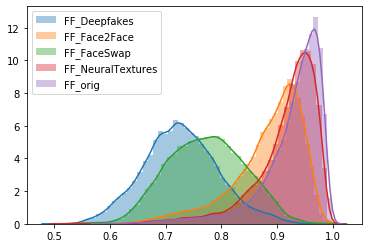

array([[0.97606726, 0.9521783 , 0.74396573, 0.58005338]])

In [13]:

### Face Forensics
results_FF_half_fab = {}
results_fpr_tpr_rate = {}
for fnc in range(len(fab_func)):
    fab_pool_params = {'frames': fab_pool_len, 'step': fab_step, 'pool_func': fab_func[fnc]}
    results_FF_half_fab[fnc], results_fpr_tpr_rate[fnc] = test_FF_half('/data/home/shruti/voxceleb/fabnet_metric/', 
                                                                       fab_pool_params)
    display(results_FF_half_fab[fnc])
    

In [22]:
for k in results_fpr_tpr_rate[0].keys():
    
    fpr, tpr, thresholds = results_fpr_tpr_rate[0][k]
    
    print(thresholds)
    thresholdsdx = np.argmin(np.abs(thresholds-0.9))
    print(f'Dataset: {k} Thres: 0.9, Orig: {tpr[thresholdsdx]}, Fake: {fpr[thresholdsdx]}')
    
    

[ 0.99827641 -0.00172359 -0.03806932 ... -0.534114   -0.53411833
 -0.68860636]
Dataset: FF_Deepfakes Thres: 0.9, Orig: 0.0, Fake: 0.0
[ 9.99584665e-01 -4.15334997e-04 -7.74288269e-04 ... -5.34058297e-01
 -5.34118328e-01 -6.55396281e-01]
Dataset: FF_FaceSwap Thres: 0.9, Orig: 0.0, Fake: 0.0
[ 9.99373623e-01 -6.26377459e-04 -1.14285760e-03 ... -5.16515460e-01
 -5.17001565e-01 -5.34118328e-01]
Dataset: FF_Face2Face Thres: 0.9, Orig: 0.0, Fake: 0.0
[ 9.99346509e-01 -6.53490927e-04 -8.75566418e-04 ... -4.81740797e-01
 -5.34118328e-01 -6.64285387e-01]
Dataset: FF_NeuralTextures Thres: 0.9, Orig: 0.0, Fake: 0.0


In [14]:

### Leaders Unseen Identities
results_unseen_id_fab = {}
for fnc in range(len(fab_func)):
    fab_pool_params = {'frames': fab_pool_len, 'step': fab_step, 'pool_func': fab_func[fnc]}
    results_unseen_id_fab[fnc] = test_unseen_identities('/data/home/shruti/voxceleb/fabnet_metric/', 
                                                        fab_pool_params, parallel=False)
    display(results_unseen_id_fab[fnc])


,diff,faceswap,imposter,leader_name
0,0.999064,0.977352,0.987321,bo
1,0.999830,0.941310,0.991391,bs
2,0.999999,0.972004,0.999999,ew
3,0.997729,0.951271,0.965964,hc
4,0.997474,0.904177,0.941764,dt
5,0.998942,NaN,NaN,jb
6,0.995124,NaN,NaN,cb
7,0.999380,NaN,NaN,pb
8,0.999941,NaN,NaN,kh
9,0.999892,NaN,NaN,br


In [18]:

### Leaders Multiple Identities
results_multiple_id_fab = {}
confusion_multiple_id_fab = {}
for fnc in range(len(fab_func)):
    fab_pool_params = {'frames': fab_pool_len, 'step': fab_step, 'pool_func': fab_func[fnc]}
    results_unseen_id_fab[fnc], confusion_multiple_id_fab[fnc] = test_multiple_identities('/data/home/shruti/voxceleb/fabnet_metric/', 
                                                                             fab_pool_params, parallel=True)
    display(results_unseen_id_fab[fnc])
    display(confusion_multiple_id_fab[fnc])
    

[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done   8 tasks      | elapsed:  1.4min
[Parallel(n_jobs=96)]: Done 258 tasks      | elapsed:  1.5min
[Parallel(n_jobs=96)]: Done 608 tasks      | elapsed:  1.7min
[Parallel(n_jobs=96)]: Done 1058 tasks      | elapsed:  2.0min
[Parallel(n_jobs=96)]: Done 1608 tasks      | elapsed:  2.3min
[Parallel(n_jobs=96)]: Done 2258 tasks      | elapsed:  2.7min
[Parallel(n_jobs=96)]: Done 3008 tasks      | elapsed:  3.1min
[Parallel(n_jobs=96)]: Done 3858 tasks      | elapsed:  3.6min
[Parallel(n_jobs=96)]: Done 4808 tasks      | elapsed:  4.1min
[Parallel(n_jobs=96)]: Done 5858 tasks      | elapsed:  4.7min
[Parallel(n_jobs=96)]: Done 7008 tasks      | elapsed:  5.4min
[Parallel(n_jobs=96)]: Done 8258 tasks      | elapsed:  6.2min
[Parallel(n_jobs=96)]: Done 9608 tasks      | elapsed:  6.9min
[Parallel(n_jobs=96)]: Done 11058 tasks      | elapsed:  7.8min
[Parallel(n_jobs=96)]: Done 12608 tasks    

,diff,faceswap,imposter,leader_name
0,0.998014,0.983604,0.991034,bo
1,0.997096,0.943371,0.986648,bs
2,0.999626,0.968900,1.000000,ew
3,0.984821,0.948411,0.964196,hc
4,0.956433,0.854900,0.923590,dt
5,0.989314,NaN,NaN,jb
6,0.987001,NaN,NaN,cb
7,0.997677,NaN,NaN,pb
8,0.999247,NaN,NaN,kh
9,0.992683,NaN,NaN,br


pred_name,bo,br,bs,cb,dt,ew,hc,jb,kh,pb
true_name,,,,,,,,,,
FF_orig,0.113000,0.070800,0.018800,0.062400,0.028200,0.055800,0.215600,0.076600,0.199600,0.159200
bo,0.999400,NaN,NaN,0.000400,NaN,0.000200,NaN,NaN,NaN,NaN
bo_faceswap,0.835616,0.028865,NaN,0.135519,NaN,NaN,NaN,NaN,NaN,NaN
bo_imposter,0.577110,0.031250,NaN,0.376218,0.004464,0.008523,NaN,0.001623,NaN,0.000812
br,0.002600,0.997400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bs,0.000400,NaN,0.999000,NaN,0.000400,NaN,NaN,0.000200,NaN,NaN
bs_faceswap,0.006400,NaN,0.736000,0.149600,0.000800,NaN,NaN,0.107200,NaN,NaN
bs_imposter,0.023566,NaN,0.527664,0.021004,0.046107,NaN,NaN,0.381660,NaN,NaN
cb,0.002200,NaN,NaN,0.975400,NaN,NaN,NaN,0.022400,NaN,NaN


In [26]:
#**************************************************************************************************************%
# fabnet only test
### Leaders Unseen Identities
fab_pool_params = {'frames': 100, 'step': 5, 'pool_func': np.mean}
results_unseen_id_onlyfab = test_unseen_identities('/data/home/shruti/voxceleb/fabnet/leaders', 
                                                    fab_pool_params, parallel=False)
display(results_unseen_id_onlyfab)

,diff,faceswap,imposter,leader_name
0,0.998150,0.991014,0.996179,bo
1,0.998473,0.789885,0.923695,bs
2,0.999890,0.947145,0.993201,ew
3,0.984534,0.951782,0.954138,hc
4,0.985797,0.902839,0.936693,dt
5,0.998666,NaN,NaN,jb
6,0.986213,NaN,NaN,cb
7,0.998880,NaN,NaN,pb
8,0.998726,NaN,NaN,kh
9,0.997264,NaN,NaN,br


In [28]:
#**************************************************************************************************************%
# fabnet only test
### Leaders Unseen Identities
fab_pool_params = {'frames': 100, 'step': 5, 'pool_func': np.mean}
results_multiple_id_onlyfab, confusion_multiple_id_onlyfab = test_multiple_identities('/data/home/shruti/voxceleb/fabnet/leaders', 
                                                                             fab_pool_params, parallel=True)
display(results_multiple_id_onlyfab)

[Parallel(n_jobs=96)]: Using backend LokyBackend with 96 concurrent workers.
[Parallel(n_jobs=96)]: Done   8 tasks      | elapsed:   42.3s
[Parallel(n_jobs=96)]: Done 258 tasks      | elapsed:  1.3min
[Parallel(n_jobs=96)]: Done 608 tasks      | elapsed:  1.4min
[Parallel(n_jobs=96)]: Done 1058 tasks      | elapsed:  1.5min
[Parallel(n_jobs=96)]: Done 1608 tasks      | elapsed:  1.7min
[Parallel(n_jobs=96)]: Done 2258 tasks      | elapsed:  1.9min
[Parallel(n_jobs=96)]: Done 3008 tasks      | elapsed:  2.1min
[Parallel(n_jobs=96)]: Done 3858 tasks      | elapsed:  2.3min
[Parallel(n_jobs=96)]: Done 4808 tasks      | elapsed:  2.6min
[Parallel(n_jobs=96)]: Done 5858 tasks      | elapsed:  2.9min
[Parallel(n_jobs=96)]: Done 7008 tasks      | elapsed:  3.2min
[Parallel(n_jobs=96)]: Done 8258 tasks      | elapsed:  3.6min
[Parallel(n_jobs=96)]: Done 9608 tasks      | elapsed:  4.0min
[Parallel(n_jobs=96)]: Done 11058 tasks      | elapsed:  4.4min
[Parallel(n_jobs=96)]: Done 12608 tasks    

,diff,faceswap,imposter,leader_name
0,0.984038,0.989782,0.991946,bo
1,0.951509,0.783573,0.899813,bs
2,0.997218,0.946844,0.988037,ew
3,0.974182,0.955010,0.957849,hc
4,0.875438,0.829352,0.898186,dt
5,0.986765,NaN,NaN,jb
6,0.972505,NaN,NaN,cb
7,0.996678,NaN,NaN,pb
8,0.994398,NaN,NaN,kh
9,0.944549,NaN,NaN,br


# multiple features (VGG and FabNet 256)

In [7]:
#**************************************************************************************************************%
# fabnet only test
### Leaders Unseen Identities
results_unseen_vgg_fab = test_unseen_identities_2feat('/data/home/shruti/voxceleb/fabnet/leaders',
                                                   '/data/home/shruti/voxceleb/vgg/leaders', 
                                                    {'frames': 100, 'step': 5, 'pool_func': np.mean, 'a': 1, 'b': 1 }, 
                                                   {'frames': 100, 'step': 5, 'pool_func': np.mean, 'a': 1, 'b': 1 },
                                                   parallel=False)
display(results_unseen_vgg_fab)

(5000, 256) (5000, 256)
(5000, 4096) (5000, 4096)
(5000, 256) (5000, 256)
(5000, 4096) (5000, 4096)
(5000, 256) (2048, 256)
(5000, 4096) (2048, 4096)
(5000, 256) (2472, 256)
(5000, 4096) (2472, 4096)
(5000, 256) (5000, 256)
(5000, 4096) (5000, 4096)
(5000, 256) (5000, 256)
(5000, 4096) (5000, 4096)
(5000, 256) (1253, 256)
(5000, 4096) (1253, 4096)
(5000, 256) (1961, 256)
(5000, 4096) (1961, 4096)
(5000, 256) (5000, 256)
(5000, 4096) (5000, 4096)
(5000, 256) (5000, 256)
(5000, 4096) (5000, 4096)
(5000, 256) (649, 256)
(5000, 4096) (649, 4096)
(5000, 256) (636, 256)
(5000, 4096) (636, 4096)
(5000, 256) (5000, 256)
(5000, 4096) (5000, 4096)
(5000, 256) (5000, 256)
(5000, 4096) (5000, 4096)
(5000, 256) (2766, 256)
(5000, 4096) (2766, 4096)
(5000, 256) (3027, 256)
(5000, 4096) (3027, 4096)
(5000, 256) (5000, 256)
(5000, 4096) (5000, 4096)
(5000, 256) (5000, 256)
(5000, 4096) (5000, 4096)
(5000, 256) (3033, 256)
(5000, 4096) (3033, 4096)
(5000, 256) (3394, 256)
(5000, 4096) (3394, 4096)
(500

,diff,faceswap,imposter,leader_name
0,0.999821,1.000000,1.000000,bo
1,0.999999,0.946775,0.999801,bs
2,1.000000,0.999243,1.000000,ew
3,1.000000,0.860251,1.000000,hc
4,0.999999,0.956773,0.992606,dt
5,0.999736,NaN,NaN,jb
6,1.000000,NaN,NaN,cb
7,1.000000,NaN,NaN,pb
8,1.000000,NaN,NaN,kh
9,1.000000,NaN,NaN,br


In [3]:
results_multiple_vgg_fab, confusion_multiple_vgg_fab = test_multiple_identities_2feat('/data/home/shruti/voxceleb/fabnet/leaders',
                                                   '/data/home/shruti/voxceleb/vgg/leaders', 
                                                    {'frames': 100, 'step': 5, 'pool_func': np.mean, 'a': 1 }, 
                                                   {'frames': 100, 'step': 5, 'pool_func': np.mean, 'a': 1 },
                                                   parallel=True)
display(results_multiple_vgg_fab)
display(confusion_multiple_vgg_fab)


['FF_orig' 'bo' 'bo_faceswap' 'bo_imposter' 'br' 'bs' 'bs_faceswap'
 'bs_imposter' 'cb' 'dt' 'dt_faceswap' 'dt_imposter' 'ew' 'ew_faceswap'
 'ew_imposter' 'hc' 'hc_faceswap' 'hc_imposter' 'jb' 'jb_faceswap'
 'jb_imposter' 'kh' 'pb']


[Parallel(n_jobs=70)]: Using backend LokyBackend with 70 concurrent workers.
[Parallel(n_jobs=70)]: Done  60 tasks      | elapsed:  1.8min
[Parallel(n_jobs=70)]: Done 310 tasks      | elapsed:  2.2min
[Parallel(n_jobs=70)]: Done 660 tasks      | elapsed:  2.4min
[Parallel(n_jobs=70)]: Done 1110 tasks      | elapsed:  2.8min
[Parallel(n_jobs=70)]: Done 1660 tasks      | elapsed:  3.2min
[Parallel(n_jobs=70)]: Done 2310 tasks      | elapsed:  3.9min
[Parallel(n_jobs=70)]: Done 3060 tasks      | elapsed:  4.5min
[Parallel(n_jobs=70)]: Done 3910 tasks      | elapsed:  5.1min
[Parallel(n_jobs=70)]: Done 4860 tasks      | elapsed:  5.8min
[Parallel(n_jobs=70)]: Done 5910 tasks      | elapsed:  6.5min
[Parallel(n_jobs=70)]: Done 7060 tasks      | elapsed:  7.4min
[Parallel(n_jobs=70)]: Done 8310 tasks      | elapsed:  8.3min
[Parallel(n_jobs=70)]: Done 9660 tasks      | elapsed:  9.3min
[Parallel(n_jobs=70)]: Done 11110 tasks      | elapsed: 10.4min
[Parallel(n_jobs=70)]: Done 12660 tasks    

/data/opt/voxceleb/lib/python3.6/site-packages/joblib/externals/loky/backend/utils.py:55: UserWarning: Failed to kill subprocesses on this platform. Pleaseinstall psutil: https://github.com/giampaolo/psutil
  warnings.warn("Failed to kill subprocesses on this platform. Please"
/data/opt/voxceleb/lib/python3.6/site-packages/joblib/externals/loky/backend/utils.py:55: UserWarning: Failed to kill subprocesses on this platform. Pleaseinstall psutil: https://github.com/giampaolo/psutil
  warnings.warn("Failed to kill subprocesses on this platform. Please"
/data/opt/voxceleb/lib/python3.6/site-packages/joblib/externals/loky/backend/utils.py:55: UserWarning: Failed to kill subprocesses on this platform. Pleaseinstall psutil: https://github.com/giampaolo/psutil
  warnings.warn("Failed to kill subprocesses on this platform. Please"
/data/opt/voxceleb/lib/python3.6/site-packages/joblib/externals/loky/backend/utils.py:55: UserWarning: Failed to kill subprocesses on this platform. Pleaseinstall psu

/data/opt/voxceleb/lib/python3.6/site-packages/joblib/externals/loky/backend/utils.py:55: UserWarning: Failed to kill subprocesses on this platform. Pleaseinstall psutil: https://github.com/giampaolo/psutil
  warnings.warn("Failed to kill subprocesses on this platform. Please"
/data/opt/voxceleb/lib/python3.6/site-packages/joblib/externals/loky/backend/utils.py:55: UserWarning: Failed to kill subprocesses on this platform. Pleaseinstall psutil: https://github.com/giampaolo/psutil
  warnings.warn("Failed to kill subprocesses on this platform. Please"
/data/opt/voxceleb/lib/python3.6/site-packages/joblib/externals/loky/backend/utils.py:55: UserWarning: Failed to kill subprocesses on this platform. Pleaseinstall psutil: https://github.com/giampaolo/psutil
  warnings.warn("Failed to kill subprocesses on this platform. Please"


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGKILL(-9)}

In [ ]:
display(results_multiple_vgg_fab)
display(confusion_multiple_vgg_fab)

# multiple features (VGG and FabNet ML 512)

In [11]:
#**************************************************************************************************************%
# fabnet only test
### Leaders Unseen Identities
results_unseen_vgg_fabML = test_unseen_identities_2feat('/data/home/shruti/voxceleb/fabnet_metric',
                                                   '/data/home/shruti/voxceleb/vgg/leaders', 
                                                    {'frames': 1, 'step': 1, 'pool_func': np.mean, 'a': 1 }, 
                                                   {'frames': 100, 'step': 5, 'pool_func': np.mean, 'a': 1 },
                                                   parallel=False)
display(results_unseen_vgg_fabML)

,diff,faceswap,imposter,leader_name
0,0.999923,0.998259,1.000000,bo
1,0.999995,0.951015,0.999682,bs
2,1.000000,0.989717,1.000000,ew
3,1.000000,0.935879,1.000000,hc
4,0.999999,0.944847,0.991047,dt
5,0.999993,NaN,NaN,jb
6,0.999988,NaN,NaN,cb
7,1.000000,NaN,NaN,pb
8,1.000000,NaN,NaN,kh
9,1.000000,NaN,NaN,br


In [14]:
results_multiple_vgg_fabML, confusion_multiple_vgg_fabML = test_multiple_identities_2feat('/data/home/shruti/voxceleb/fabnet_metric',
                                                   '/data/home/shruti/voxceleb/vgg/leaders', 
                                                    {'frames': 1, 'step': 1, 'pool_func': np.mean, 'a': 1 }, 
                                                   {'frames': 100, 'step': 5, 'pool_func': np.mean, 'a': 1 },
                                                   parallel=True)
display(results_multiple_vgg_fabML)
display(confusion_multiple_vgg_fabML)


[Parallel(n_jobs=48)]: Using backend LokyBackend with 48 concurrent workers.
[Parallel(n_jobs=48)]: Done 104 tasks      | elapsed:  1.7min
[Parallel(n_jobs=48)]: Done 354 tasks      | elapsed:  2.0min
[Parallel(n_jobs=48)]: Done 704 tasks      | elapsed:  2.3min
[Parallel(n_jobs=48)]: Done 1154 tasks      | elapsed:  2.8min
[Parallel(n_jobs=48)]: Done 1704 tasks      | elapsed:  3.3min
[Parallel(n_jobs=48)]: Done 2354 tasks      | elapsed:  3.9min
[Parallel(n_jobs=48)]: Done 3104 tasks      | elapsed:  4.6min
[Parallel(n_jobs=48)]: Done 3954 tasks      | elapsed:  5.4min
[Parallel(n_jobs=48)]: Done 4904 tasks      | elapsed:  6.3min
[Parallel(n_jobs=48)]: Done 5954 tasks      | elapsed:  7.3min
[Parallel(n_jobs=48)]: Done 7104 tasks      | elapsed:  8.4min
[Parallel(n_jobs=48)]: Done 8354 tasks      | elapsed:  9.6min
[Parallel(n_jobs=48)]: Done 9704 tasks      | elapsed: 10.9min
[Parallel(n_jobs=48)]: Done 11154 tasks      | elapsed: 12.3min
[Parallel(n_jobs=48)]: Done 12704 tasks    

,diff,faceswap,imposter,leader_name
0,0.999588,0.991545,0.999707,bo
1,0.999423,0.944570,0.999766,bs
2,0.999920,0.984809,1.000000,ew
3,0.998207,0.949211,0.999989,hc
4,0.998108,0.939342,0.991274,dt
5,0.998914,NaN,NaN,jb
6,0.997745,NaN,NaN,cb
7,0.999719,NaN,NaN,pb
8,0.999858,NaN,NaN,kh
9,0.998446,NaN,NaN,br


pred_name,bo,br,bs,cb,dt,ew,hc,jb,kh,pb
true_name,,,,,,,,,,
FF_orig,0.100600,0.0512,0.030600,0.085800,0.039000,0.064400,0.171600,0.079800,0.246200,0.1308
bo,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bo_faceswap,0.980431,NaN,NaN,0.019569,NaN,NaN,NaN,NaN,NaN,NaN
bo_imposter,0.583604,NaN,NaN,0.416396,NaN,NaN,NaN,NaN,NaN,NaN
br,NaN,1.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bs,0.001000,NaN,0.999000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bs_faceswap,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bs_imposter,NaN,NaN,0.649590,0.024590,0.001025,NaN,NaN,0.324795,NaN,NaN
cb,NaN,NaN,NaN,0.999800,NaN,NaN,NaN,0.000200,NaN,NaN


In [ ]:
### Face Forensics
results_FF_vgg_fabML, results_fpr_tpr_vgg_fabML = test_FF_half_2feat('/data/home/shruti/voxceleb/fabnet_metric',
                                                   '/data/home/shruti/voxceleb/vgg/leaders', 
                                                    {'frames': 1, 'step': 1, 'pool_func': np.mean, 'a': 1 }, 
                                                   {'frames': 100, 'step': 5, 'pool_func': np.mean, 'a': 1 })
display(results_FF_vgg_fabML)



source embedding (5000, 512)
